### 关键结论
该超市有着极为特别的营业模式，在商品毛利润远低于同行情况下，实现了营收。

#### 结论1：2010年-2018年，总收入和净利润持续增长，且净利润也保持增长且维持在2.5%左右

2018年营收达1415.7亿美元，较2017年同比增长了9.72%，较2010年同比增长了81.62%，在2018年的净利润为31.3亿元，净利润率为2.3%

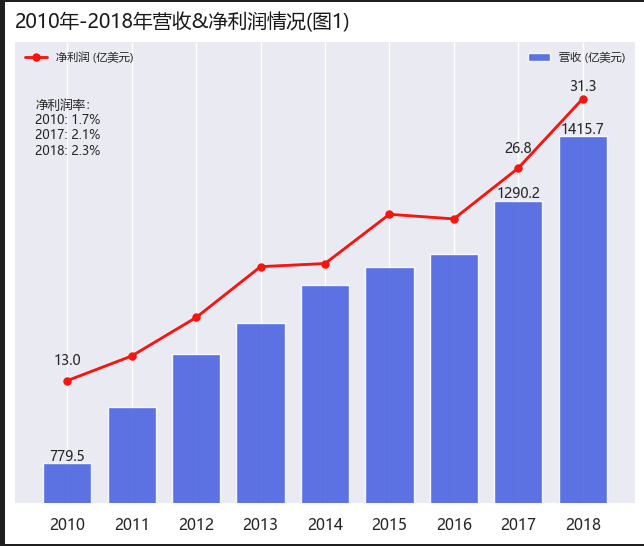

#### 结论2：会员费收入是收入核心，客户的黏度较好。

1. 会员费收入是该超市的主要收入，在销售毛利如此低的情况下，实现了营收，说明该超市的服务深受顾客欢迎，从而导致顾客的黏性较高。类似于国内的餐饮界海底捞。

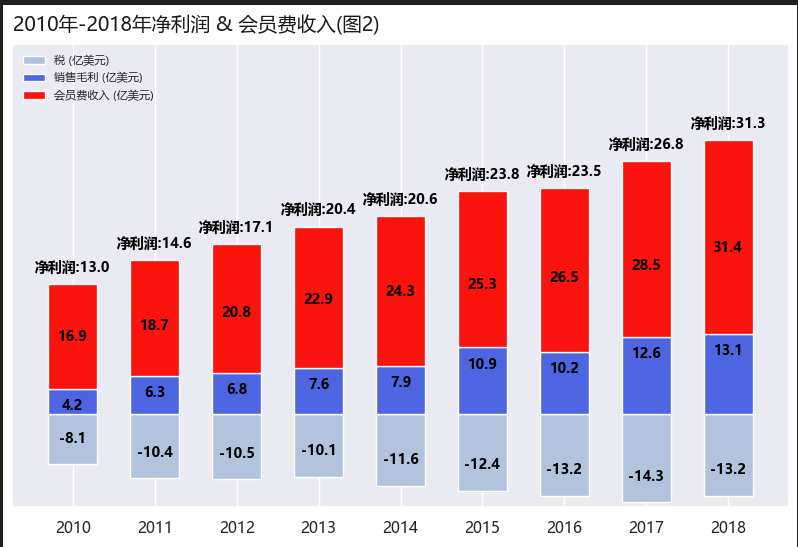

2. 从会员贡献的人均营收(客单价格)看：付费会员人均贡献营收整体呈现增长的趋势，2016年受美国经济影响，从而导致客单价下跌。

从会员费来看在2010年-2018年会员费呈现增在的趋势，其中在2011年和2016年有过短暂的下跌，但跌幅不大。2018年的会员费相对于2010年同比增在了13.64%。

从付费会员人数来看，2010年至2018年，付费会员人数持续增长并且付费会员人数远多余非付费会员人数，说明该超市的服务和商品深受顾客的喜爱，，从而顾客的忠诚度较高。在2011年付费会员人数增在率最高，但在2011年以后付费会员人数增在率在8%一下，建议超市设置会员日等有利于付费会员的措施，来吸取更多的会员。

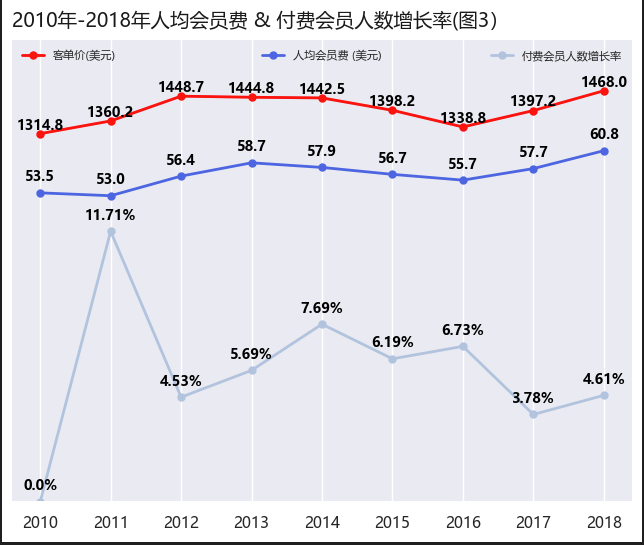

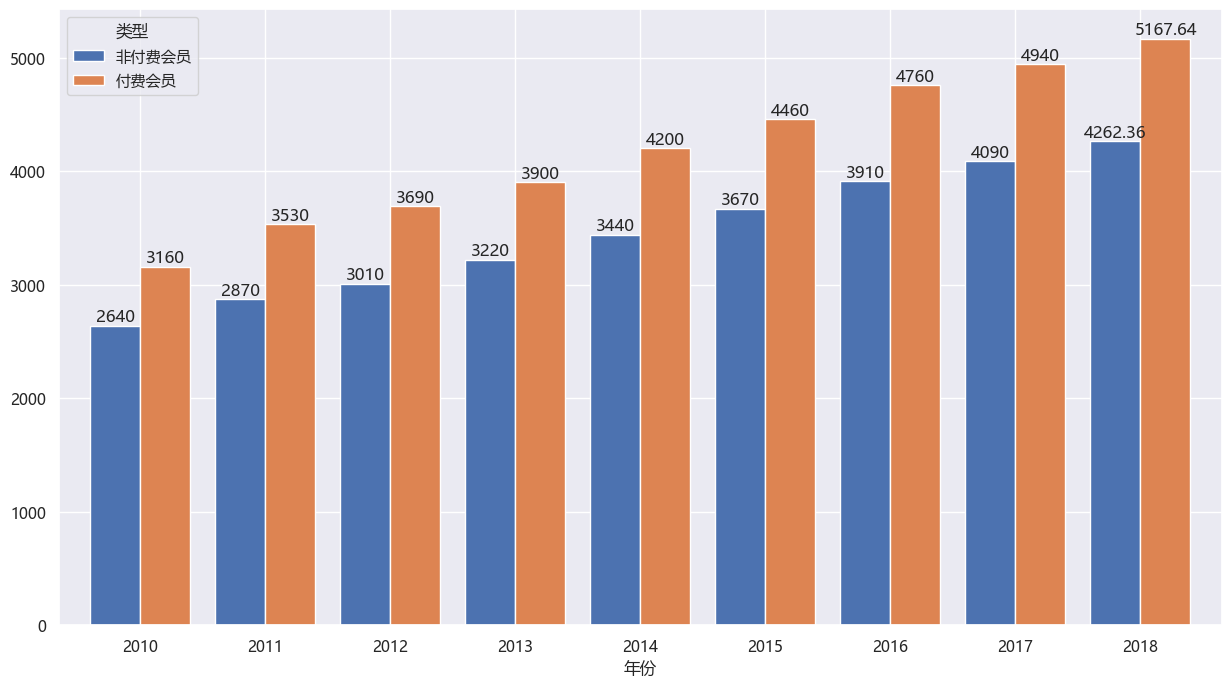

#### 结论3：该超市的商品平均毛利率为10.9%，远低于同类型的WMT和Target

该超市的商品毛利率远低于同体量的超市。该超市的商品毛利率最高是在2016年11.3%，可能是受当年美国GDP的影响，导致该超市改变了商品销售价格，但改变较为轻微。

同时在保持低毛利的背后，需要强大成熟的商品供应链体系以及丰富的商品种类和商品质量保证。

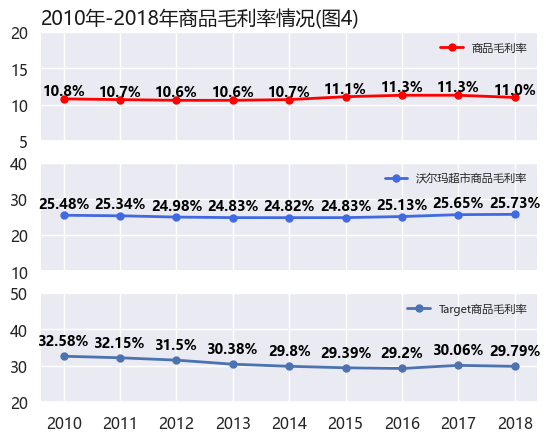

#### 结论4：该超市的运营成本占比均值为9.88%，高于同行业的5%

2010年-2018年该超市的运营成本占比平均值为9.88%，高于同行业，因此超市应该适当的控制运营成本的投入。

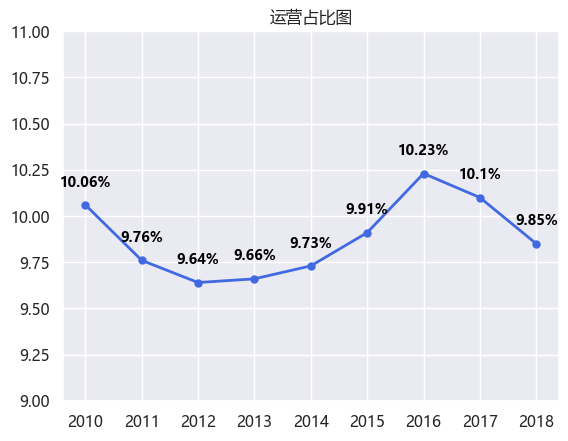

In [254]:
data['运营成本占比'].mean()

9.882222222222222

### 分析思路
#### 企业表现
1. 总收入同比
2. 商品毛利率表现（标准在15%-20%）
3. 净利润占比（小型超市标准在5%，大型在10%-15%）

#### 企业的优点与缺点
1. 会员贡献率
2. 运营成本率（标准2%）

#### 企业值得学习/警惕的点

1. 会员表现力

In [98]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# 画图的主题设计
sns.set_theme()
sns.set_context('notebook')
plt.rcParams['font.family'] = 'Microsoft YaHei'
import warnings
warnings.filterwarnings('ignore')
import re


In [77]:
# 删除多余的行
data.drop(index = '类型', axis = 0, inplace = True)
data.drop(index = '单位',axis = 0, inplace = True)

In [79]:
#返回数据
data.reset_index(inplace=True,drop=False)

In [80]:
#改列名
data=data.rename(columns = {"index":"年份"})

#整理数据
data['年份'] = data['年份'].apply(lambda x : re.sub("年",'',x))

类型,年份,总收入,商品销售收入,会员费收入,总成本,商品成本,运营费用,税,商品毛利,净利润,全部会员人数,付费会员
0,2010,779.5,762.6,16.9,766.5,680.0,78.4,8.1,82.6,13.0,5800.0,3160.0
1,2011,889.2,870.5,18.7,874.6,777.4,86.8,10.4,93.1,14.6,6400.0,3530.0
2,2012,991.4,970.6,20.8,974.3,868.2,95.6,10.5,102.4,17.1,6700.0,3690.0
3,2013,1051.6,1028.7,22.9,1031.2,919.5,101.6,10.1,109.2,20.4,7120.0,3900.0
4,2014,1126.4,1102.1,24.3,1105.8,984.6,109.6,11.6,117.5,20.6,7640.0,4200.0
5,2015,1162.0,1136.7,25.3,1138.2,1010.7,115.1,12.4,126.0,23.8,8130.0,4460.0
6,2016,1187.2,1160.7,26.5,1163.7,1029.0,121.5,13.2,131.7,23.5,8670.0,4760.0
7,2017,1290.2,1261.7,28.5,1263.4,1118.8,130.3,14.3,142.9,26.8,9030.0,4940.0
8,2018,1415.7,1384.3,31.4,1384.4,1231.8,139.4,13.2,152.5,31.3,9430.0,5167.64


In [84]:
# 转换数据类型
for column in data.columns:
    if column != '年份':
        data[column] = data[column].astype('float64')

In [91]:
#新加计算字段
data['销售毛利'] = data['商品毛利'] - data['运营费用']
data['利润总额'] = data['销售毛利'] + data['会员费收入']
#净利润=利润总额-税

data['商品毛利率'] = round(data['商品毛利']/data['商品销售收入']*100,1)
data['营业利润率'] = round(data['销售毛利']/data['商品销售收入']*100,1) #（营业利润率）
data['净利润率'] = round(data['净利润']/data['商品销售收入']*100,1)
data['人均会员费'] = round(data['会员费收入']/data['付费会员']*10000,1)
data['客单价'] = round(data['商品销售收入']/data['全部会员人数']*10000,1) # 单位为亿
data['运营成本占比'] = round((data['运营费用']/data['总收入'])*100, 2)
#增长率
growth = round(data.iloc[:,2:].pct_change(periods=1).fillna(0)*100,2)
growth.insert(loc= 0 , column= '年份', value= data['年份'])

In [92]:
growth

类型,年份,商品销售收入,会员费收入,总成本,商品成本,运营费用,税,商品毛利,净利润,全部会员人数,付费会员,销售毛利,利润总额,商品毛利率,营业利润率,净利润率,人均会员费,客单价
0,2010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2011,14.15,10.65,14.10,14.32,10.71,28.40,12.71,12.31,10.34,11.71,50.00,18.48,-0.93,16.67,0.00,-0.93,3.45
2,2012,11.50,11.23,11.40,11.68,10.14,0.96,9.99,17.12,4.69,4.53,7.94,10.40,-0.93,0.00,5.88,6.42,6.51
3,2013,5.99,10.10,5.84,5.91,6.28,-3.81,6.64,19.30,6.27,5.69,11.76,10.51,0.00,0.00,11.11,4.08,-0.27
4,2014,7.14,6.11,7.23,7.08,7.87,14.85,7.60,0.98,7.30,7.69,3.95,5.57,0.94,0.00,-5.00,-1.36,-0.16
5,2015,3.14,4.12,2.93,2.65,5.02,6.90,7.23,15.53,6.41,6.19,37.97,12.42,3.74,42.86,10.53,-2.07,-3.07
6,2016,2.11,4.74,2.24,1.81,5.56,6.45,4.52,-1.26,6.64,6.73,-6.42,1.38,1.80,-10.00,-4.76,-1.76,-4.25
7,2017,8.70,7.55,8.57,8.73,7.24,8.33,8.50,14.04,4.15,3.78,23.53,11.99,0.00,11.11,5.00,3.59,4.36
8,2018,9.72,10.18,9.58,10.10,6.98,-7.69,6.72,16.79,4.43,4.61,3.97,8.27,-2.65,-10.00,9.52,5.37,5.07


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6),dpi =100)
x = data['年份']
y1 = data['总收入']
y2 = data['净利润']
y3=data['净利润率']
# 绘制柱形图，营收情况
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.set_title("2010年-2018年营收&净利润情况(图1)", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 14}, loc='left',pad=10)
ax.bar(x, y1, color='royalblue', alpha=.9, label='营收 (亿美元)',width=0.75)  # 绘制图像

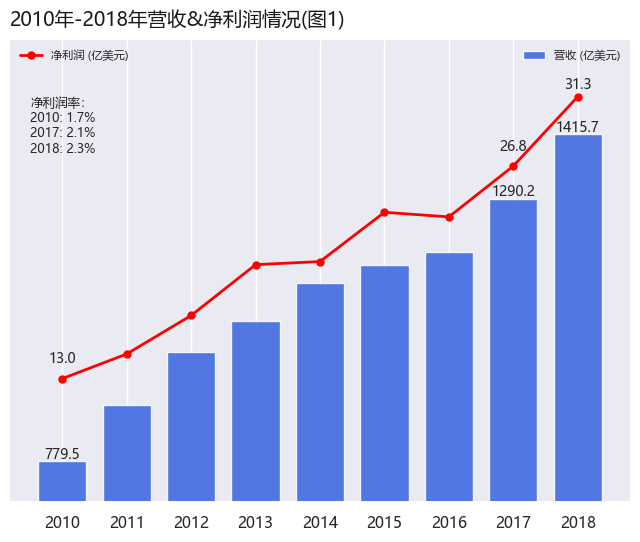

In [123]:
fig, ax = plt.subplots(figsize=(8, 6),dpi =100)
x = data['年份']
y1 = data['总收入']
y2 = data['净利润']
y3=data['净利润率']
# 绘制柱形图，营收情况
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.set_title("2010年-2018年营收&净利润情况(图1)", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 14}, loc='left',pad=10)
ax.bar(x, y1, color='royalblue', alpha=.9, label='营收 (亿美元)',width=0.75)  # 绘制图像
ax.text('2010',779.5+5,'779.5',fontsize=10,horizontalalignment='center') #添加数字标签，2010的营收
ax.text('2017',1290.2+5,'1290.2',fontsize=10,horizontalalignment='center')#添加数字标签，2017的营收
ax.text('2018',1415.7+5,'1415.7',fontsize=10,horizontalalignment='center')#添加数字标签，2018的营收
ax.text('2010',1470,'净利润率：',fontsize=9,horizontalalignment='center')#在x轴"2010"位置上添加净利润率的备注
ax.text('2010',1440,'2010: 1.7%',fontsize=9,horizontalalignment='center')#2010的净利润率
ax.text('2010',1410,'2017: 2.1%',fontsize=9,horizontalalignment='center')#2017的净利润率
ax.text('2010',1380,'2018: 2.3%',fontsize=9,horizontalalignment='center')#2018的净利润率
ax.legend(loc='best', fontsize=8,frameon=False)
ax.set_ylim(700, 1600)#设置y轴范围区间
plt.yticks([])#隐藏y轴
# 添加次坐标轴，净利润
ax1 = ax.twinx()
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.plot(x, y2, linestyle='-', marker='o', markersize=5,linewidth=2, color='red', label='净利润 (亿美元)')  # 绘制图像
# horizontalalignment参数设置注释居中显示
ax1.text('2010',13.0+1,'13.0',fontsize=10,horizontalalignment='center')
ax1.text('2017',26.8+1,'26.8',fontsize=10,horizontalalignment='center')
ax1.text('2018',31.3+0.5,'31.3',fontsize=10,horizontalalignment='center')
ax1.legend(loc='upper left', fontsize=8,frameon=False)
ax1.set_ylim(5,35)#设置y轴范围区间
plt.yticks([])#隐藏y轴
plt.show()


- 至2018年经营向好,总营收和净利润持续增长,2018年营收达1415.7亿美元，较2017年增长9.72%,较2010年增长81.62%，净利润达31.3亿美元较2017年增长16.80%，较2010年增长140.77%  
- 2015年-2016年虽然营收呈增在趋势，但净利润曾下滑趋势，这是由于2015-2016年世界经济增速放缓，美国在2016年GDP同比仅仅增长1.6%，人均GDP同比仅仅增长0.9%

([], [])

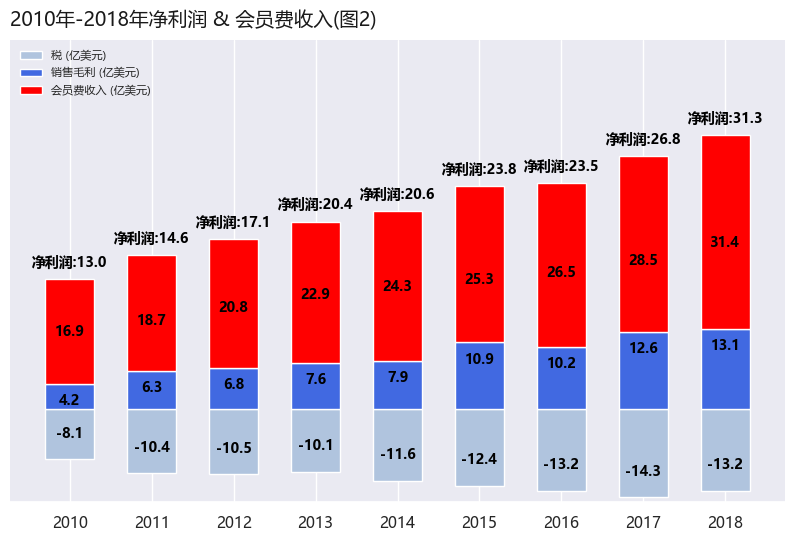

In [124]:
#基于低销售毛利+付费会员制的商业模式,净利润的主要来源于会员费收入，甚至约等于会员费收入;
#净利润=销售毛利+会员费收入-税
#2010年-2018年净利润 & 会员费收入(图2)
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
x = data['年份']
y1 = data['会员费收入']
y2 = round(data['销售毛利'],1)
y3 = -data['税']
y4=data['净利润']
# 绘制堆叠图
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.set_title(
    "2010年-2018年净利润 & 会员费收入(图2)",
    fontdict={
        'family': 'Microsoft YaHei',
        'color': 'k',
        'size': 14},
    loc='left',
    pad=10)
ax.bar(x, y3, linestyle='-',width=0.6, color='lightsteelblue', label='税 (亿美元)')  # 税
ax.bar(x, y2, bottom=0,linestyle='-',width=0.6, color='royalblue', label='销售毛利 (亿美元)')#销售毛利，调整bottom这个参数的值从而形成堆叠
ax.bar(x, y1, bottom=y2,linestyle='-',width=0.6, color='red', label='会员费收入 (亿美元)')#会员费收入
#添加数字标签
for a, b,c,d in zip(x, y4,y1,y2):
    ax.text(a,c+d+2,'净利润:'+str(b),fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
for a, b in zip(x, y1):
    ax.text(a,b-5,b,fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
for a, b in zip(x, y2):
    ax.text(a,b-3.5,b,fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
for a, b in zip(x, y3):
    ax.text(a,b+3.5,b,fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
ax.legend(loc='upper left', fontsize=8, frameon=False)
ax.set_ylim(-15, 60)#设置y轴区间
plt.yticks([])#隐藏y轴

- 该超市的主要收入来自会员费收入，该超市的客户黏度较好，是一家成熟的企业

([], [])

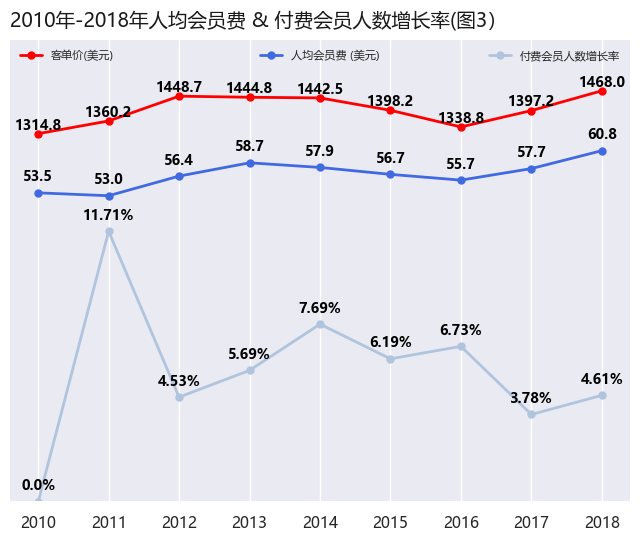

In [125]:
#会员费以及付费会员人数增长率（图3）
fig, ax = plt.subplots(figsize=(8, 6),dpi =100)
x=data['年份']
x2=data['年份']
y1=growth['付费会员']
y2=data['人均会员费']
y3=data['客单价']
# 付费会员人数增长率
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.set_title("2010年-2018年人均会员费 & 付费会员人数增长率(图3）", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 14}, loc='left',pad=10)
ax.plot(x, y1, linestyle='-', marker='o', markersize=5,linewidth=2,color='lightsteelblue', label='付费会员人数增长率')  # 绘制图像
for a,b in zip(x,y1):
     ax.text(a,b+0.5,str(b)+'%',fontsize=10,color='black',fontweight='heavy',horizontalalignment='center')
ax.legend(loc='upper right', fontsize=8,frameon=False)
ax.set_ylim(0,20)
#隐藏Y轴
plt.yticks([])
# 添加次坐标轴，人均会员费
ax1 = ax.twinx()
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.plot(x, y2, linestyle='-', marker='o', markersize=5,linewidth=2, color='royalblue', label='人均会员费 (美元)')  # 绘制图像
# 循环生成text
for x,y in zip(x,y2):
     ax1.text(x,y+2,y,fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
ax1.legend(loc='upper center', fontsize=8,frameon=False)
ax1.set_ylim(0,80)
plt.yticks([])
#添加次次坐标轴，客单价
ax2 = ax1.twinx()
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.plot(x2, y3, linestyle='-', marker='o', markersize=5,linewidth=2, color='red', label='客单价(美元)')  # 绘制图像
# horizontalalignment参数设置注释居中显示
# 循环生成text
for x,y in zip(x2,y3):
     ax2.text(x,y+15,y,fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
ax2.legend(loc='upper left', fontsize=8,frameon=False)
ax2.set_ylim(0,1650)
plt.yticks([])

In [190]:
data

类型,年份,总收入,商品销售收入,会员费收入,总成本,商品成本,运营费用,税,商品毛利,净利润,全部会员人数,付费会员,销售毛利,利润总额,商品毛利率,营业利润率,净利润率,人均会员费,客单价
0,2010,779.5,762.6,16.9,766.5,680.0,78.4,8.1,82.6,13.0,5800.0,3160.00,4.2,21.1,10.8,0.6,1.7,53.5,1314.8
1,2011,889.2,870.5,18.7,874.6,777.4,86.8,10.4,93.1,14.6,6400.0,3530.00,6.3,25.0,10.7,0.7,1.7,53.0,1360.2
2,2012,991.4,970.6,20.8,974.3,868.2,95.6,10.5,102.4,17.1,6700.0,3690.00,6.8,27.6,10.6,0.7,1.8,56.4,1448.7
3,2013,1051.6,1028.7,22.9,1031.2,919.5,101.6,10.1,109.2,20.4,7120.0,3900.00,7.6,30.5,10.6,0.7,2.0,58.7,1444.8
4,2014,1126.4,1102.1,24.3,1105.8,984.6,109.6,11.6,117.5,20.6,7640.0,4200.00,7.9,32.2,10.7,0.7,1.9,57.9,1442.5
5,2015,1162.0,1136.7,25.3,1138.2,1010.7,115.1,12.4,126.0,23.8,8130.0,4460.00,10.9,36.2,11.1,1.0,2.1,56.7,1398.2
6,2016,1187.2,1160.7,26.5,1163.7,1029.0,121.5,13.2,131.7,23.5,8670.0,4760.00,10.2,36.7,11.3,0.9,2.0,55.7,1338.8
7,2017,1290.2,1261.7,28.5,1263.4,1118.8,130.3,14.3,142.9,26.8,9030.0,4940.00,12.6,41.1,11.3,1.0,2.1,57.7,1397.2
8,2018,1415.7,1384.3,31.4,1384.4,1231.8,139.4,13.2,152.5,31.3,9430.0,5167.64,13.1,44.5,11.0,0.9,2.3,60.8,1468.0


[Text(0, 0, '3160'),
 Text(0, 0, '3530'),
 Text(0, 0, '3690'),
 Text(0, 0, '3900'),
 Text(0, 0, '4200'),
 Text(0, 0, '4460'),
 Text(0, 0, '4760'),
 Text(0, 0, '4940'),
 Text(0, 0, '5167.64')]

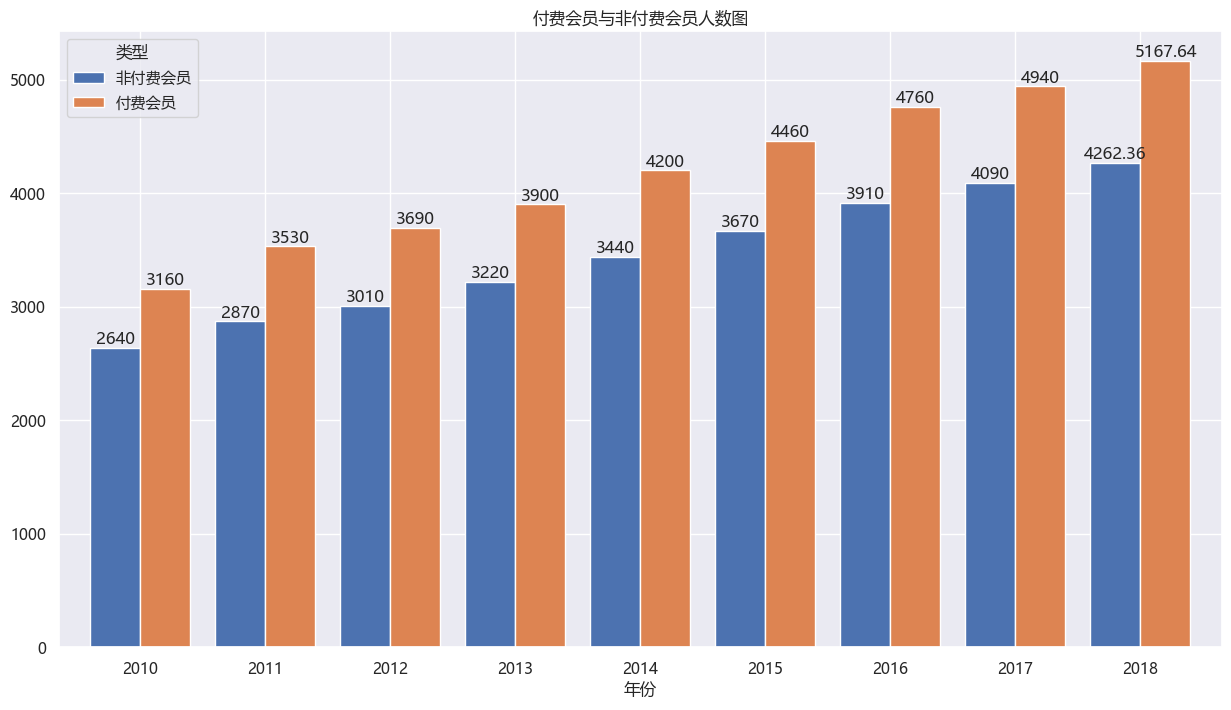

In [236]:
ax = data[['年份','非付费会员','付费会员']].plot(kind='bar',x = '年份', width=0.8, figsize=(15,8))
ax.set_title('付费会员与非付费会员人数图')
ax.tick_params(axis='x', rotation=0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

- 2010-2018年付费会员人数呈增长的趋势，但增在的速度从2011年-2018年呈下降的趋势。

(20.0, 50.0)

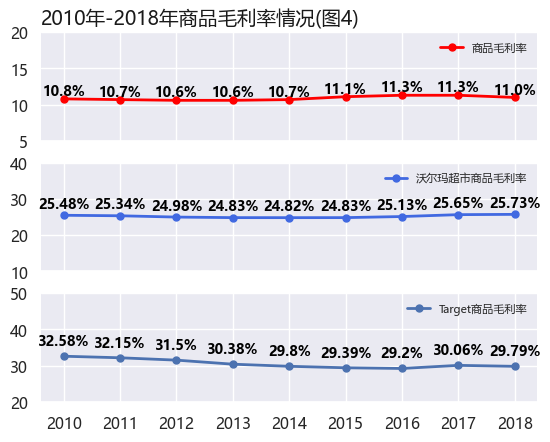

In [184]:
fig, axes = plt.subplots(3,1, sharex=True)


x=data['年份']
y1=data['商品毛利率']
# 国外商超的毛利率 数据来源于http://basic.10jqka.com.cn/WMT/finance.html
WMT = [25.48, 25.34, 24.98, 24.83, 24.82, 24.83, 25.13, 25.65, 25.73]

Target = [32.58, 32.15, 31.50, 30.38, 29.80, 29.39, 29.20, 30.06, 29.79]

# 绘制商品毛利率
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].spines['left'].set_color('none')
axes[0].set_title("2010年-2018年商品毛利率情况(图4)", fontdict={'family':'Microsoft YaHei', 'color': 'k', 'size': 14}, loc='left',pad=5)
axes[0].plot(x, y1, linestyle='-', marker='o', markersize=5,linewidth=2,color='red', label='商品毛利率') 
for a,b in zip(x,y1):
     axes[0].text(a,b+0.5,str(b)+'%',fontsize=10,color='black',fontweight='heavy',horizontalalignment='center')
axes[0].legend(loc='upper right', fontsize=8,frameon=False)
axes[0].set_ylim(5,20)
#隐藏Y轴


axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].spines['left'].set_color('none')
axes[1].plot(x, WMT, linestyle='-', marker='o', markersize=5,linewidth=2, color='royalblue', label='沃尔玛超市商品毛利率')  # 绘制图像
#添加数字标签
for x,y in zip(x,WMT):
     axes[1].text(x,y+2,str(y)+'%',fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
axes[1].legend(loc='upper right', fontsize=8,frameon=False)
axes[1].set_ylim(10,40)


axes[2].spines['right'].set_color('none')
axes[2].spines['top'].set_color('none')
axes[2].spines['left'].set_color('none')

axes[2].plot(data['年份'], Target, linestyle='-', marker='o', markersize=5,linewidth=2, label='Target商品毛利率')  # 绘制图像
#添加数字标签
for x,y in zip(data['年份'],Target):
     axes[2].text(x,y+3,str(y)+'%',fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')
axes[2].legend(loc='upper right', fontsize=8,frameon=False)
axes[2].set_ylim(20,50)
# plt.yticks([])

- 2010至2018该超市的商品毛利率均值为10.90%,远低于同类型的WMT的25.20%和Target30.53%，结合前面的分析，该超市并非靠售卖商品而获取收益

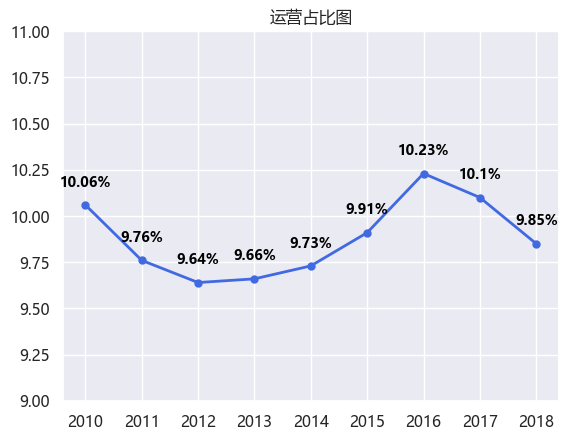

In [253]:
data['运营成本占比'] = round((data['运营费用']/data['总收入'])*100, 2)

plt.plot(data['年份'], data['运营成本占比'], linestyle='-', marker='o', markersize=5, linewidth=2, color='royalblue', label='运营成本')
plt.ylim(9,11)
plt.title('运营占比图')
for x, y in zip(data['年份'], data['运营成本占比']):
    plt.text(x, y+0.1, str(y)+'%', fontsize=10,horizontalalignment='center',color='black',fontweight='heavy')


### referring：

1. https://www.heywhale.com/mw/project/64db752a00151985793e7ade

2. https://www.heywhale.com/mw/project/64d9a0554d4ec8ad0b3d1f59

